In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv("bank-additional-full.csv",sep=";")
data_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
data_df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [4]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Observation
1.Total of 21 columns
   * 10 numerical columns
   * 11 categorical columns

2.Total of 41188 rows

In [5]:
#The duration column had to be dropped as adviced in the data description
data_df.drop('duration',axis=1,inplace=True)

#for the pdays column,we set the 999 to 0 to indicate no previous contact
data_df.pdays = data_df.pdays.replace({999: 0})

In [6]:
#Splitting the features into numerical and categorical columns
#This will help in the exploratory analysis

numeric_col = data_df[['age','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]
categorical_col = data_df.drop(numeric_col,axis=1)

In [7]:
numeric_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   campaign        41188 non-null  int64  
 2   pdays           41188 non-null  int64  
 3   previous        41188 non-null  int64  
 4   emp.var.rate    41188 non-null  float64
 5   cons.price.idx  41188 non-null  float64
 6   cons.conf.idx   41188 non-null  float64
 7   euribor3m       41188 non-null  float64
 8   nr.employed     41188 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 2.8 MB


In [8]:
categorical_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


## Statistical Analysis of our data

In [9]:
stats_df = pd.DataFrame(columns=['Mean','Mode','Median'])
for column in numeric_col:
    if pd.api.types.is_numeric_dtype(data_df[column]):
        stats_df.loc[column] = [data_df[column].mean(),data_df[column].mode().values[0],
                                data_df[column].median()]
stats_df

,Mean,Mode,Median
age,40.024060,31.000,38.000
campaign,2.567593,1.000,2.000
pdays,0.221229,0.000,0.000
previous,0.172963,0.000,0.000
emp.var.rate,0.081886,1.400,1.100
cons.price.idx,93.575664,93.994,93.749
cons.conf.idx,-40.502600,-36.400,-41.800
euribor3m,3.621291,4.857,4.857
nr.employed,5167.035911,5228.100,5191.000


In [10]:
stats_df = pd.DataFrame(columns=['Min','25th_percentile','Mean','75th_percentile','Max'])
for column in numeric_col:
    if pd.api.types.is_numeric_dtype(data_df[column]):
        stats_df.loc[column] = [data_df[column].min(),data_df[column].quantile(0.25),data_df[column].mean(),data_df[column].quantile(0.75),data_df[column].max()]
stats_df    

,Min,25th_percentile,Mean,75th_percentile,Max
age,17.000,32.000,40.024060,47.000,98.000
campaign,1.000,1.000,2.567593,3.000,56.000
pdays,0.000,0.000,0.221229,0.000,27.000
previous,0.000,0.000,0.172963,0.000,7.000
emp.var.rate,-3.400,-1.800,0.081886,1.400,1.400
cons.price.idx,92.201,93.075,93.575664,93.994,94.767
cons.conf.idx,-50.800,-42.700,-40.502600,-36.400,-26.900
euribor3m,0.634,1.344,3.621291,4.961,5.045
nr.employed,4963.600,5099.100,5167.035911,5228.100,5228.100


### Observation
* The youngest person is 17 years while the oldest is 98 years
* The average age is 40 years
* the call duration in average was 258 seconds
* The longest call lasted 4918 seconds while the lowest call lasted 0 seconds,does this mean
  no contact?
* During the campaign clients were contacted atleast once,while the most a client was contacted is 56 times
* On average clients were contacted 2 times
* Before this campaign,most clients were never contacted,while the most times a client was contacted was 7 times


In [11]:
#checking for missing values in the numerical columns
outliers_count_df = pd.DataFrame(columns=['Outlier_Count','skewness'])
for column in numeric_col:
    if pd.api.types.is_numeric_dtype(numeric_col[column]):
        Q1 = numeric_col[column].quantile(0.25)
        Q3 = numeric_col[column].quantile(0.75)
        IQR = Q3-Q1
        lower_whisker = Q1-1.5*IQR
        upper_whisker = Q3+1.5*IQR
        outliers_count_df.loc[column] = [((numeric_col[column]<lower_whisker) | (numeric_col[column] > upper_whisker)).sum(),numeric_col[column].skew()]
outliers_count_df

,Outlier_Count,skewness
age,469.0,0.784697
campaign,2406.0,4.762507
pdays,1500.0,7.939537
previous,5625.0,3.832042
emp.var.rate,0.0,-0.724096
cons.price.idx,0.0,-0.230888
cons.conf.idx,447.0,0.303180
euribor3m,0.0,-0.709188
nr.employed,0.0,-1.044262


### Observations
* We have columns with outliers,this columns seemed to be highly skewed depending on the outliers count

In [12]:
#selecting numerical columns with outliers
outlier_col = outliers_count_df[outliers_count_df['Outlier_Count']>=1]
outlier_col = outlier_col.T
outlier_col

,age,campaign,pdays,previous,cons.conf.idx
Outlier_Count,469.000000,2406.000000,1500.000000,5625.000000,447.00000
skewness,0.784697,4.762507,7.939537,3.832042,0.30318


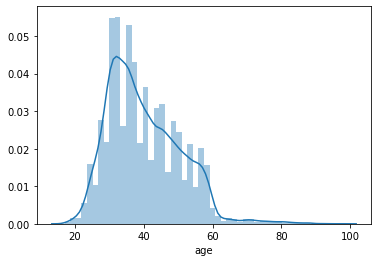

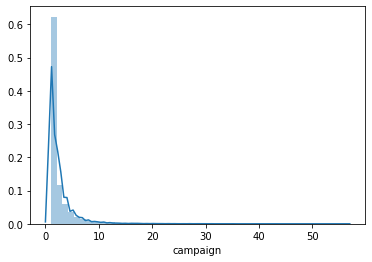

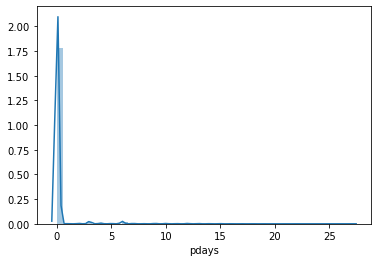

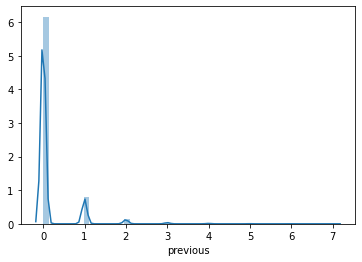

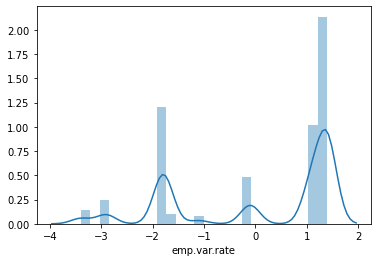

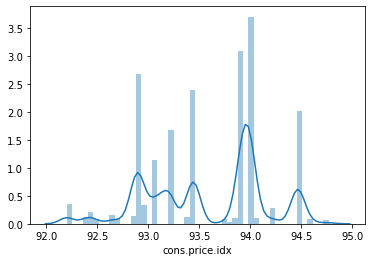

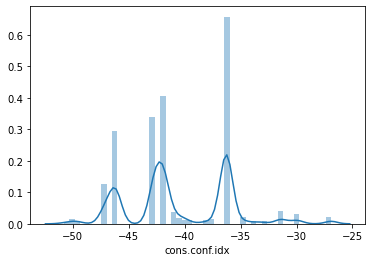

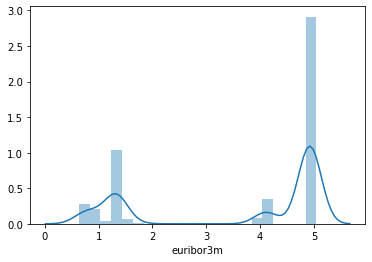

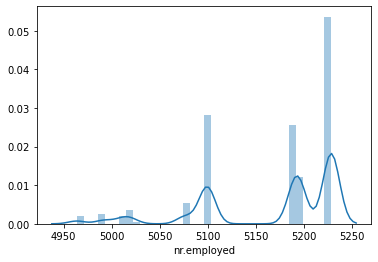

In [13]:
for i,col in enumerate(numeric_col):
    plt.figure(i)
    sns.distplot(numeric_col[col])

#### Age
* Majority of the populations is between age 20 and 60
* We have little data on ages 80 and above
* Most people are between age 30 and 40

#### duration
* The data is highly skewed to the left
* This was also shown in the statistical analysis that the column had many outliers
* We may have to normalize this column

#### campaign
* The data is highly skewed to the left
* This was also shown in the statistical analysis that the column had many outliers
* We may have to normalize this column

### pdays
* This column need to be processed so that we put the 999 value as 0,from the description this 
  shows the client was never contacted
* From the plot ,it seems most clients in this campaign were never contacted

#### previous
* The data is highly skewed to the left
* This was also shown in the statistical analysis that the column had many outliers
* We may have to normalize this column

### For the remaing numerical columns,we need to further analyse them

## Summary for Numerical Columns
*# We have to deal with outliers in the select columns
*# We have to normalize the data
*# We have to scale the data as the columns have varying units of measurements

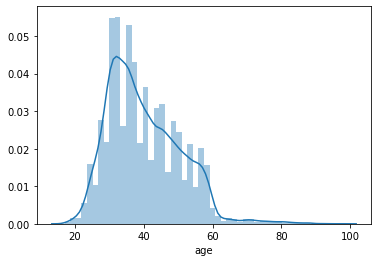

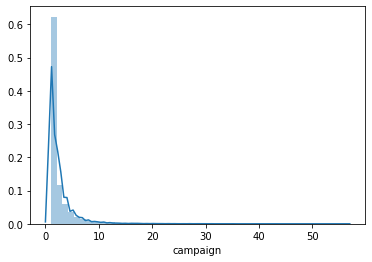

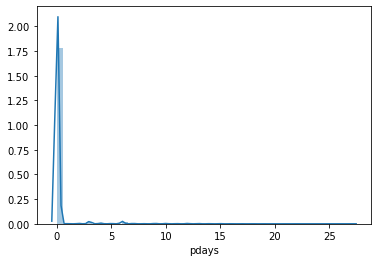

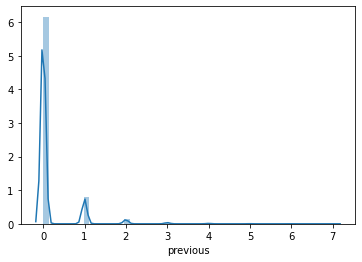

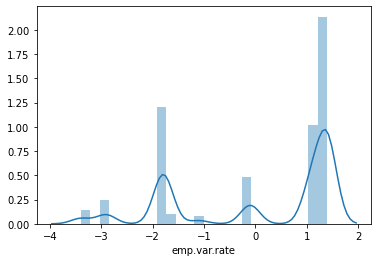

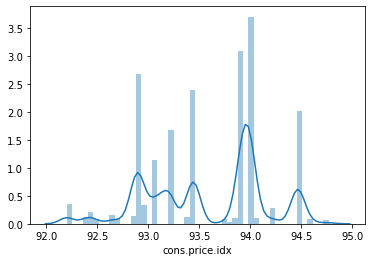

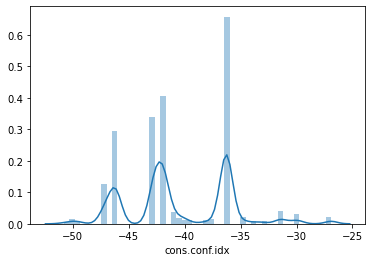

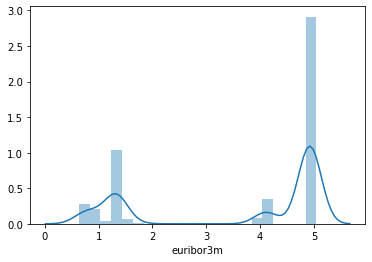

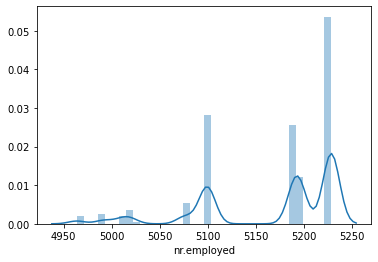

In [14]:
for i,z in enumerate(numeric_col):
    plt.figure(i)
    sns.distplot(data_df[z])

<AxesSubplot:xlabel='y', ylabel='count'>

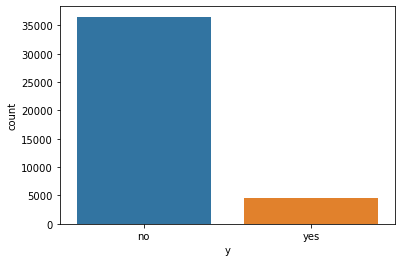

In [15]:
### Exploring the target column
sns.countplot(x="y",data=data_df)

In [16]:
count_no_response = len(data_df[data_df['y']=="no"])
count_yes_response = len(data_df[data_df['y']=="yes"])
pct_of_no_sub = count_no_response/(len(data_df['y']))
print("percentage of no responses is", pct_of_no_sub*100)
pct_of_sub = count_yes_response/(len(data_df['y']))
print("percentage of yes responses", pct_of_sub*100)

percentage of no responses is 88.73458288821988
percentage of yes responses 11.265417111780131


#### Observation
* Our data is highly imbalanced with no class having 91.4% and yes having 8.6%
* we need to label encode our data

In [17]:
##replcing the no with 0 and yes with 1
data_df.y = data_df.y.replace({"no": 0,
                              "yes":1})

In [18]:
#Dealing with the imbalanced data


### Statistical Analysis of Categorical Columns

In [19]:
stats_df = pd.DataFrame(columns=['Count','Missing','Unique','Dtype','Mode'])
for column in categorical_col.drop('y',axis=1):
    stats_df.loc[column] = [data_df[column].count(),data_df[column].isnull().sum(),data_df[column].nunique(),
                                data_df[column].dtype,data_df[column].mode().values[0]]
stats_df

,Count,Missing,Unique,Dtype,Mode
job,41188,0,12,object,admin.
marital,41188,0,4,object,married
education,41188,0,8,object,university.degree
default,41188,0,3,object,no
housing,41188,0,3,object,yes
loan,41188,0,3,object,no
contact,41188,0,2,object,cellular
month,41188,0,10,object,may
day_of_week,41188,0,5,object,thu
poutcome,41188,0,3,object,nonexistent


### Observation
* We have no missing data in the categorical columns
* The various categorical columns had varying number of unique values

In [20]:
#analysis of each categorical column
data_df.groupby('job').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
job,,,,,,,,,,
admin.,38.187296,2.623489,0.275187,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,2.558461,0.086341,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,2.535714,0.106456,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,2.639623,0.219811,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,2.476060,0.204172,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,2.476744,0.578488,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,2.660802,0.118227,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,2.587805,0.103301,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,2.104000,1.057143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [21]:
data_df.groupby('marital').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
marital,,,,,,,,,,
divorced,44.899393,2.61340,0.181700,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,2.57281,0.187781,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,2.53380,0.306881,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,3.18750,0.537500,0.275000,-0.221250,93.471250,-40.820000,3.313037,5157.393750,0.150000


In [22]:
data_df.groupby('education').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
education,,,,,,,,,,
basic.4y,47.596504,2.600575,0.196360,0.147031,0.215924,93.658309,-40.239871,3.751768,5170.124880,0.102490
basic.6y,40.448953,2.556283,0.110384,0.129145,0.231152,93.650062,-41.127880,3.772942,5174.718063,0.082024
basic.9y,39.061208,2.532341,0.129694,0.141439,0.159239,93.623399,-41.326749,3.697963,5172.294012,0.078246
high.school,37.998213,2.568576,0.215765,0.185917,0.032937,93.584857,-40.940641,3.556157,5164.994735,0.108355
illiterate,48.500000,2.277778,0.333333,0.111111,-0.133333,93.317333,-39.950000,3.516556,5171.777778,0.222222
professional.course,40.080107,2.586115,0.255007,0.163075,0.173012,93.569864,-40.124108,3.710457,5170.155979,0.113485
university.degree,38.879191,2.563527,0.261834,0.192390,-0.028090,93.493466,-39.975805,3.529663,5163.226298,0.137245
unknown,43.481225,2.596187,0.388793,0.226459,0.059099,93.658615,-39.877816,3.571098,5159.549509,0.145003


In [23]:
data_df.groupby('default').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
default,,,,,,,,,,
no,39.140635,2.520744,0.268197,0.199030,-0.082168,93.525639,-40.565469,3.447246,5159.990214,0.12879
unknown,43.371990,2.745609,0.043271,0.074096,0.703466,93.765365,-40.265139,4.280654,5193.725951,0.05153
yes,42.333333,1.333333,0.000000,0.333333,0.900000,93.362667,-38.066667,4.693000,5217.333333,0.00000


In [24]:
data_df.groupby('housing').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
housing,,,,,,,,,,
no,40.044195,2.601010,0.215337,0.161153,0.184089,93.624836,-40.337590,3.732474,5170.661857,0.108796
unknown,39.951515,2.560606,0.206061,0.184848,0.113434,93.636011,-40.289192,3.653046,5166.457273,0.108081
yes,40.010011,2.539071,0.227011,0.182610,-0.007773,93.530456,-40.654811,3.523873,5163.932949,0.116194


In [25]:
data_df.groupby('loan').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
loan,,,,,,,,,,
no,40.058822,2.561414,0.223299,0.173078,0.080150,93.575402,-40.481284,3.620732,5166.920563,0.113402
unknown,39.951515,2.560606,0.206061,0.184848,0.113434,93.636011,-40.289192,3.653046,5166.457273,0.108081
yes,39.846671,2.602273,0.212388,0.170455,0.086316,93.567529,-40.652241,3.619294,5167.754369,0.109315


In [26]:
data_df.groupby('contact').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
contact,,,,,,,,,,
cellular,39.968559,2.405026,0.321680,0.252869,-0.387137,93.315957,-41.385959,3.095316,5152.284260,0.147376
telephone,40.120513,2.850106,0.046663,0.034100,0.896969,94.026993,-38.967469,4.535349,5192.671856,0.052313


In [27]:
data_df.groupby('month').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
month,,,,,,,,,,
apr,40.593845,1.947188,0.236702,0.323328,-1.800000,93.119558,-46.273632,1.361070,5093.123708,0.204787
aug,41.644221,2.666559,0.224021,0.115410,0.747151,93.311065,-35.597184,4.300623,5200.248349,0.106021
dec,47.307692,2.159341,1.554945,0.615385,-2.846154,92.715363,-33.708791,0.865319,5031.895604,0.489011
jul,39.035545,3.160998,0.132562,0.047115,1.158921,93.894923,-42.370170,4.685678,5214.078575,0.090466
jun,39.766077,3.072208,0.150809,0.083114,0.688379,94.245402,-41.579428,4.256908,5197.493193,0.105115
mar,40.778388,2.203297,1.124542,0.483516,-1.800000,93.097330,-42.650549,1.162745,5055.390110,0.505495
may,39.031084,2.439756,0.113879,0.164209,-0.164972,93.528882,-40.579272,3.293665,5149.521592,0.064347
nov,40.965618,1.909290,0.234089,0.293587,-0.418483,93.200943,-41.238747,3.723123,5173.031236,0.101439
oct,44.171309,1.545961,1.353760,0.647632,-2.438579,93.175107,-34.580919,1.200123,5018.823816,0.438719


In [28]:
data_df.groupby('day_of_week').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
day_of_week,,,,,,,,,,
fri,40.177846,2.719944,0.192028,0.177463,0.032337,93.578735,-40.532260,3.566249,5165.109799,0.108087
mon,40.412497,2.645760,0.227155,0.171012,0.026063,93.577108,-40.877790,3.542196,5164.568393,0.099483
thu,39.591557,2.595268,0.239476,0.174417,0.058460,93.556380,-40.753323,3.574923,5166.662693,0.121188
tue,40.427441,2.426823,0.231026,0.173053,0.128220,93.577088,-40.034227,3.701038,5168.486094,0.117800
wed,39.526801,2.449840,0.214040,0.169044,0.166745,93.590225,-40.281387,3.726885,5170.425436,0.116671


In [29]:
data_df.groupby('poutcome').mean()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
poutcome,,,,,,,,,,
failure,39.946143,2.005174,0.338664,1.168627,-1.685442,93.067755,-42.720461,1.651071,5092.589534,0.142286
nonexistent,39.956190,2.664145,0.000000,0.000000,0.377091,93.645708,-40.319045,3.958189,5181.203492,0.088322
success,42.023307,1.808449,5.587764,1.569556,-2.091260,93.334355,-38.388565,0.996563,5030.622433,0.651129


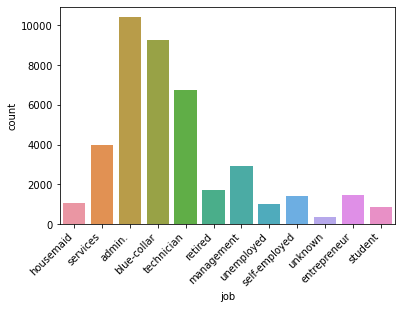

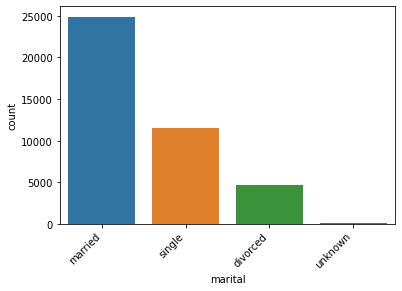

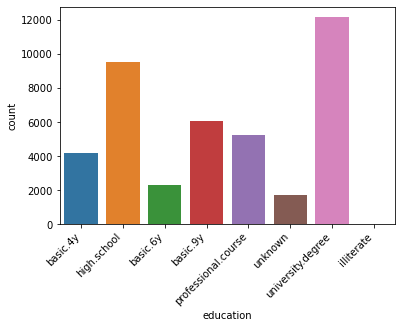

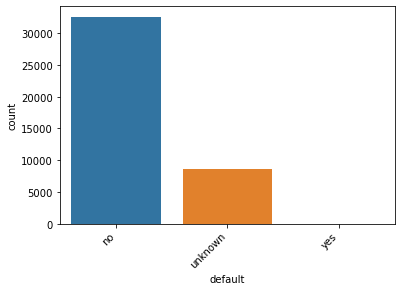

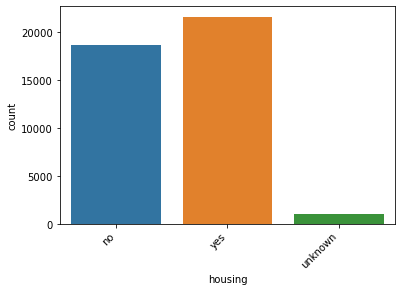

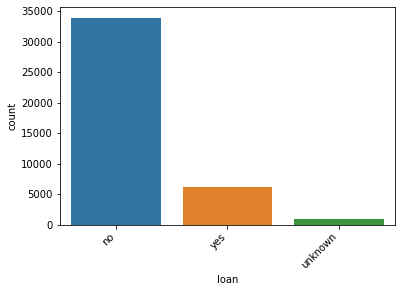

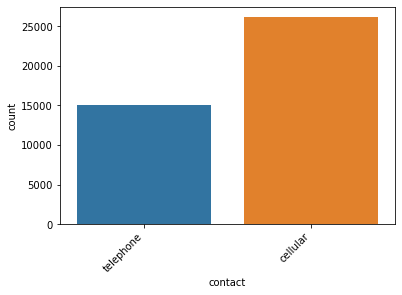

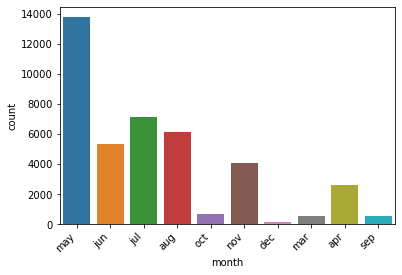

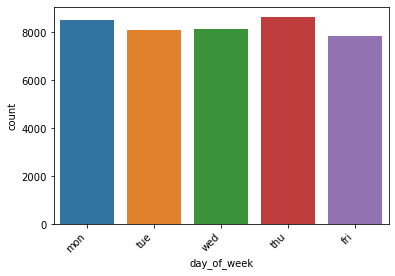

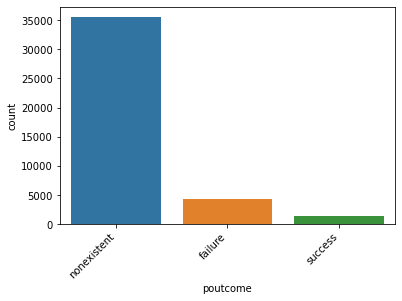

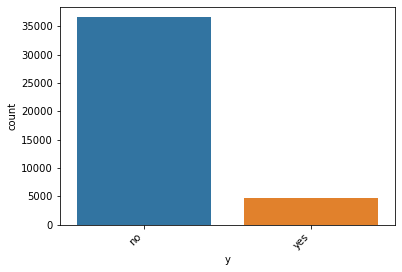

In [30]:
for i,col in enumerate(categorical_col.drop('y',axis=1)):
    plt.figure(i)
    chart = sns.countplot(x=col,data=categorical_col)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

#### Observations

##### job
* We have 12 distinct job groups
* Most people work in the admin sector while very few ppl have there job types as unknown

##### marital
* Majority of the population is married
* Few clients have their marital staus as unknown

#### education
* We have 8 sub groups in the education category
* Most of the poplation seems to have some form of education with a very minute percentage as illiterate
* We can group the basic education categories in one as basic

#### default
* Majority of the population is aware of there credit score,most have a good credit score while few don't now

####  housing
* Most of the population has a housing loan while very few people are not aware

#### loan
* Most people have no outstanding loans while others do have loans

#### contact
* We have two forms of contact and most people were contated through their cellular phone

#### month
* The monthly period seems to start from march to December,their is no data for the first 3 months
* The month of May had the most activity while December had the least activity

#### day_of_week
* Activity during the weekdays seem to be evenly distributed

#### poutcome
* Most of the previous campaigns were not successful
* Most of data for previous campaigns was not there

In [31]:
#Function to treat outliers
def outlier_treatment(datacolumn):
        sorted(datacolumn)
        Q1,Q3 = np.percentile(datacolumn , [25,75])
        IQR = Q3 - Q1
        lower_range = Q1 -(1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)
        return lower_range,upper_range

In [32]:
for i in outlier_col.columns:
    lower_range,upper_range = outlier_treatment(data_df[i])
    data_df.drop(data_df[ (data_df[i] > upper_range) | (data_df[i] < lower_range) ].index , inplace=True)

In [33]:
outliers_count_df = pd.DataFrame(columns=['Outlier_Count','skewness'])
for column in data_df[outlier_col.columns]:
    if pd.api.types.is_numeric_dtype(data_df[column]):
        Q1 = data_df[column].quantile(0.25)
        Q3 = data_df[column].quantile(0.75)
        IQR = Q3-Q1
        lower_whisker = Q1-1.5*IQR
        upper_whisker = Q3+1.5*IQR
        outliers_count_df.loc[column] = [((data_df[column]<lower_whisker) | (data_df[column] > upper_whisker)).sum(),numeric_col[column].skew()]
outliers_count_df

,Outlier_Count,skewness
age,0.0,0.784697
campaign,0.0,4.762507
pdays,0.0,7.939537
previous,0.0,3.832042
cons.conf.idx,0.0,0.303180


In [34]:
#standardizing with sklearn
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

for i in numeric_col:
    data_df[i] = scale.fit_transform(data_df[[i]])
data_df.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,3.276500e+04,3.276500e+04,32765.0,32765.0,3.276500e+04,3.276500e+04,3.276500e+04,3.276500e+04,3.276500e+04,32765.000000
mean,3.539160e-16,3.122788e-17,0.0,0.0,2.775812e-16,1.554455e-15,6.661948e-16,-1.665487e-16,3.442007e-15,0.086861
std,1.000015e+00,1.000015e+00,0.0,0.0,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,1.000015e+00,0.281636
min,-2.283344e+00,-8.343910e-01,0.0,0.0,-2.673646e+00,-2.690222e+00,-2.490007e+00,-2.140839e+00,-3.589122e+00,0.000000
25%,-8.063664e-01,-8.343910e-01,0.0,0.0,-3.442465e-01,-8.320847e-01,-5.430842e-01,3.399360e-02,1.504897e-01,0.000000
50%,-1.733760e-01,-6.504187e-02,0.0,0.0,5.028079e-01,5.033932e-01,-3.267594e-01,5.720834e-01,2.294261e-01,0.000000
75%,7.761094e-01,7.043072e-01,0.0,0.0,7.145715e-01,6.447530e-01,9.711891e-01,6.382209e-01,7.606022e-01,0.000000
max,3.097074e+00,3.012354e+00,0.0,0.0,7.145715e-01,2.082531e+00,2.557571e+00,6.915162e-01,7.606022e-01,1.000000
